In [18]:
#Import python packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression

In [15]:
# reading the dataset 
df = pd.read_csv(r"banknote_data.csv")

In [3]:
# restructuring the data in an array format
# creating separate variables for data and the target column
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [4]:
# creating the train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

### SVM - rbf kernel (Default)

In [5]:
#generating the model
# setting variables for C value and kernel for ease of modification
C_val = 100
kernel_type = "rbf" 
model = svm.SVC(kernel = kernel_type, C = C_val) 
model.fit(X_train,y_train) # fitting the data in the model
preds = model.predict(X_test) #running the model with the test data

Accuracy for our testing dataset with rbf kernel, where 'C= 100 ' is : 90.91%
0.94 cross validation accuracy with a standard deviation of 0.01


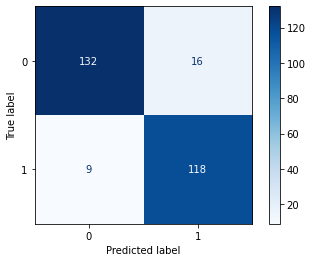

In [6]:
# creating confusion matrix, and printing accuracy and cross validation accuracy
confusion_matrix(y_test, preds)
disp = plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues)
test_accuracy = accuracy_score(y_test,preds)*100
scores = cross_val_score(model, X, y, cv=5)
print("Accuracy for our testing dataset with", kernel_type,"kernel, where 'C=", C_val, "' is : {:.2f}%".format(test_accuracy))
print("%0.2f cross validation accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

### SVM - linear kernel

In [7]:
#generating the model
# setting variables for C value and kernel for ease of modification
C_val = 100
kernel_type = "linear"
model = svm.SVC(kernel = kernel_type, C = C_val)
model.fit(X_train,y_train) # fitting the data in the model
preds = model.predict(X_test) #running the model with the test data

Accuracy for our testing dataset with linear kernel, where 'C= 100 ' is : 81.45%
0.82 cross validation accuracy with a standard deviation of 0.02


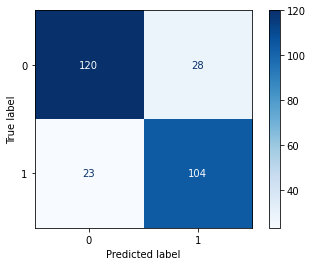

In [8]:
# creating confusion matrix, and printing accuracy and cross validation accuracy
confusion_matrix(y_test, preds)
disp = plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues)
test_accuracy = accuracy_score(y_test,preds)*100
scores = cross_val_score(model, X, y, cv=5) 
print("Accuracy for our testing dataset with", kernel_type,"kernel, where 'C=", C_val, "' is : {:.2f}%".format(test_accuracy))
print("%0.2f cross validation accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

### SVM - poly kernel

In [48]:
#generating the model
# setting variables for C value and kernel for ease of modification
C_val = 100
kernel_type = "poly"
model = svm.SVC(kernel = kernel_type, C = C_val, degree = 3)
model.fit(X_train,y_train) # fitting the data in the model
preds = model.predict(X_test) #running the model with the test data

Accuracy for our testing dataset with poly kernel, where 'C= 100 ' is : 77.45%
0.81 cross validation accuracy with a standard deviation of 0.02


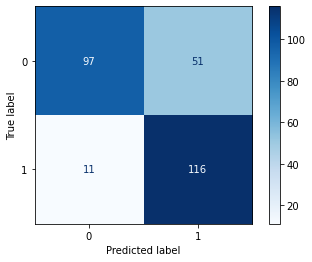

In [47]:
# creating confusion matrix, and printing accuracy and cross validation accuracy
confusion_matrix(y_test, preds)
disp = plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues)
test_accuracy = accuracy_score(y_test,preds)*100
scores = cross_val_score(model, X, y, cv=5)
print("Accuracy for our testing dataset with", kernel_type,"kernel, where 'C=", C_val, "' is : {:.2f}%".format(test_accuracy))
print("%0.2f cross validation accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

### SVM - sigmoid kernel

In [11]:
#generating the model
# setting variables for C value and kernel for ease of modification
C_val = 100
kernel_type = "sigmoid"
model = svm.SVC(kernel = kernel_type, C = C_val)
model.fit(X_train,y_train) # fitting the data in the model
preds = model.predict(X_test) #running the model with the test data

Accuracy for our testing dataset with sigmoid kernel, where 'C= 100 ' is : 49.45%
0.51 cross validation accuracy with a standard deviation of 0.13


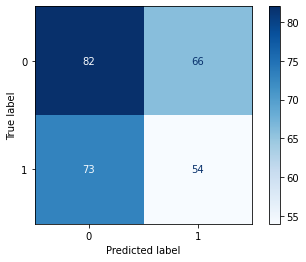

In [12]:
# creating confusion matrix, and printing accuracy and cross validation accuracy
confusion_matrix(y_test, preds)
disp = plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues)
test_accuracy = accuracy_score(y_test,preds)*100
scores = cross_val_score(model, X, y, cv=5)
print("Accuracy for our testing dataset with", kernel_type,"kernel, where 'C=", C_val, "' is : {:.2f}%".format(test_accuracy))
print("%0.2f cross validation accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

### Utilizing grid search to find the optimized values for an rbf kernel model

In [28]:
# creating a model
grid_model = svm.SVC()

In [34]:
# specifying search parameters for the model
parameters = {"C": [0.1, 1, 10, 100, 1000,10000], 
              "gamma": [1,0.1,0.01,0.001,0.0001],
              "kernel": ["rbf"]} 
grid = GridSearchCV(grid_model, parameters, refit = True, verbose = 1,cv=15) #creating the grid search with specified parameters

In [35]:
#fitting the data in the grid search model
grid_search = grid.fit(X_train, y_train)

Fitting 15 folds for each of 30 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   32.0s finished


In [37]:
# calculating the accuray and picking the best parameters
accuracy = grid_search.best_score_ *100
print(grid_search.best_params_)
print("Accuracy for the training dataset by applying grid search is : {:.2f}%".format(accuracy) )

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Accuracy for the training dataset by applying grid search is : 97.63%
